### PCA - Wine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
wine_std.shape

(178, 13)

#### 차원 축소
    - 13차원데이터 -> 2, 4, 6 차원으로 축소

In [5]:
from sklearn.decomposition import PCA

- 2차원

In [6]:
pca2 = PCA(n_components=2)
wine_pca2 = pca2.fit_transform(wine_std)

In [9]:
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 ]), 0.554063383569353)

- 4차원

In [7]:
pca4 = PCA(n_components=4)
wine_pca4 = pca4.fit_transform(wine_std)

In [10]:
pca4.explained_variance_ratio_, pca4.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

- 6차원

In [8]:
pca6 = PCA(n_components=6)
wine_pca6 = pca6.fit_transform(wine_std)

In [11]:
pca6.explained_variance_ratio_, pca6.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]),
 0.8509811607477046)

2. PCA 전후의 분류 비교

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

100.0

In [20]:
# 2차원 축소 데이터
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9722222222222222

In [21]:
# 4차원 축소 데이터
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9722222222222222

In [23]:
# 6차원 축소 데이터
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca6, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9722222222222222

3. 시각화

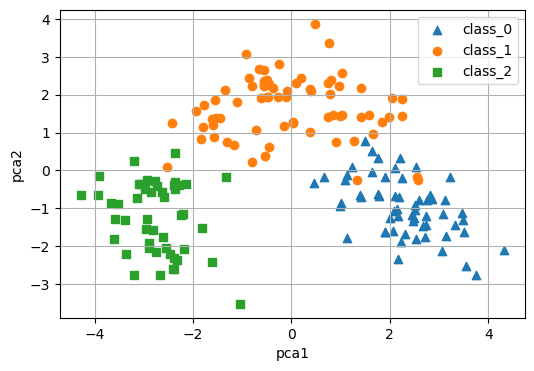

In [25]:
wine_df = pd.DataFrame(wine_pca2, columns=['pca1', 'pca2'])
wine_df['rating'] = wine.target
markers = ['^', 'o', 's']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = wine_df[wine_df.rating == i]['pca1']
    y_data = wine_df[wine_df.rating == i]['pca2']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
    plt.grid()
plt.legend()
plt.xlabel('pca1'), plt.ylabel('pca2');

4. Code refactoring

In [26]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2023
    )
    rfc = RandomForestClassifier(random_state=2023)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [29]:
for n in [2, 4, 6]:
    pca = PCA(n_components=n)
    wine_pca = pca.fit_transform(wine_std)
    explained = sum(pca.explained_variance_ratio_)
    accuracy = pca_accuracy(wine_pca, wine.target)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{accuracy:.4f}')

PCA2: 설명력-0.5541, 정확도-0.9722
PCA4: 설명력-0.7360, 정확도-0.9722
PCA6: 설명력-0.8510, 정확도-0.9722
